In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [2]:
uri = "dadosParaMineracaoRegrasAssociacao2019.csv"
dados = pd.read_csv(uri,sep=";",encoding='latin1')
dados['TP_LINGUA'].replace(0, "Inglês", inplace=True)
dados['TP_LINGUA'].replace(1, "Espanhol", inplace=True)
dados.rename(columns={"Q024" : "Tem Computador"}, inplace=True)
dados.rename(columns={"Q022" : "Tem Celular"}, inplace=True)
dados.rename(columns={"Q025" : "Tem Internet"}, inplace=True)
dados.rename(columns={"Q001" : "Estudo Pai"}, inplace=True)
dados.rename(columns={"Q002" : "Estudo Mãe"}, inplace=True)
dados.rename(columns={"Q003" : "Trabalho Pai"}, inplace=True)
dados.rename(columns={"Q004" : "Trabalho Mãe"}, inplace=True)
dados

TP_SEXO TP_COR_RACA   CO_ESCOLA NO_MUNICIPIO_ESC SG_UF_ESC  \
0            F      Branco  15230023.0      Paragominas        PA   
1            F       Parda  15042626.0            Belém        PA   
2            F       Parda  15045560.0        Castanhal        PA   
3            F       Parda  15038378.0            Belém        PA   
4            F       Parda  15582949.0      Paragominas        PA   
...        ...         ...         ...              ...       ...   
920583       F      Branco  31103527.0   João Monlevade        MG   
920584       F      Branco  31174688.0      Três Pontas        MG   
920585       F       Preta  31253227.0       Ouro Preto        MG   
920586       F       Parda  31009107.0       Uberlândia        MG   
920587       F       Parda  31233269.0          Salinas        MG   

       TP_DEPENDENCIA_ADM_ESC TP_LOCALIZACAO_ESC  NU_NOTA_CN  NU_NOTA_CH  \
0                  Particular             Urbano       574.2       538.7   
1                    Estadual             Urbano       369.7       398.2   
2                    Estadual             Urbano       376.4       354.7   
3                    Estadual             Urbano       423.0       372.8   
4                    Estadual             Urbano       412.5       417.2   
...                       ...                ...         ...         ...   
920583               Estadual             Urbano       533.3       485.8   
920584               Estadual             Urbano       486.2       543.4   
920585                Federal             Urbano       500.8       563.2   
920586                Federal             Urbano       491.6       549.3   
920587                Federal              Rural       425.7       525.0   

        NU_NOTA_LC  ...  Tem Internet RendaMaxima  ClasseSocial  \
0            582.6  ...           Sim        1497             E   
1            395.6  ...           Nao         998             E   
2            525.8  ...           Nao        1497             E   
3            488.7  ...           Nao        1497             E   
4            485.1  ...           Sim        1497             E   
...            ...  ...           ...         ...           ...   
920583       530.2  ...           Sim         998             E   
920584       560.3  ...           Sim        7984             C   
920585       555.3  ...           Sim        4990             C   
920586       586.8  ...           Sim        7984             C   
920587       511.5  ...           Sim        7984             C   

        anosEstudoPai anosEstudoMae   COR_RACA RazaoPessoasQuarto  \
0                   0            12     Branco               0.75   
1                   4             4  NaoBranco               4.00   
2                   4             9  NaoBranco               1.50   
3                  12            12  NaoBranco               3.00   
4                  12            12  NaoBranco               1.50   
...               ...           ...        ...                ...   
920583              9            12     Branco               2.50   
920584             16            16     Branco               1.50   
920585             16            18  NaoBranco               1.67   
920586             12            18  NaoBranco               1.33   
920587             12            18  NaoBranco               2.00   

       PessoasPorQuarto NU_MEDIA       MEDIA_FAIXA  
0                (0, 1]   581.40  (576.04, 713.43]  
1                (3, 4]   423.46     (0.0, 438.65]  
2                (1, 2]   461.26  (438.65, 576.04]  
3                (2, 3]   468.20  (438.65, 576.04]  
4                (1, 2]   468.20  (438.65, 576.04]  
...                 ...      ...               ...  
920583           (2, 3]   536.96  (438.65, 576.04]  
920584           (1, 2]   573.02  (438.65, 576.04]  
920585           (1, 2]   568.42  (438.65, 576.04]  
920586           (1, 2]   580.24  (576.04, 713.43]  
920587           (1, 2]   540.80  (438.65, 576.0

In [3]:
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
import time
def clustering(data_clustering,num_clusters=2):
    oldTime = time.time()
    clusterer = KMeans(n_clusters=num_clusters,random_state=13)
    cluster_labels = clusterer.fit_predict(data_clustering)
    elapsed = time.time() - oldTime;
    print("Time: ", elapsed)
    return cluster_labels, clusterer

def preprocess(data,preprocess_method=-1):
    if preprocess_method == 0:
        scaler = StandardScaler()
        X = scaler.fit_transform(data.values)
    elif preprocess_method == 1:
        scaler = preprocessing.QuantileTransformer(n_quantiles=5, random_state=13)
        X = scaler.fit_transform(data.values)
    elif preprocess_method == 2:
        scaler = preprocessing.MinMaxScaler()
        X = scaler.fit_transform(data.values)
    elif preprocess_method == -1: #sem processar
        X = data.values
    return X

def silhouette(data_silhouette,cluster_labels):
    oldTime = time.time()
    silhouette_avg = silhouette_score(data_silhouette, cluster_labels)
    print(silhouette_avg)
    elapsed = time.time() - oldTime
    print("Time: ", elapsed)
    return silhouette_avg

def get_notas(dataframe_enem):
    col = dataframe_enem[['NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN']]
    return col



In [15]:
def print_silhouettes(silhouette_scores):
# silhouette_scores = silhouette_scores[:6]
    ax = plt.subplots(figsize=(7, 5))
    plt.plot(range(2,7),silhouette_scores,"bo-",color="blue",linewidth=3,label="Curva Silhueta")
    t = plt.xlabel("Número de clusters")
    text = plt.ylabel("Valor da Silhueta")
    p = plt.xticks([2,3,4,5,6,7,8])

    k = np.argmax(silhouette_scores) + 2

    plt.axvline(x=k,linestyle="--",label="Numero escolhido de clusters({})".format(k))

    plt.scatter(k,silhouette_scores[k-2],c="red",s=400)

    plt.legend(shadow=True)
    text.set_fontsize(20)
    t.set_fontsize(20)

    plt.show()

In [ ]:
range_n_clusters = [2]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
  
    fig = plt.figure()
    fig.set_size_inches(8, 8)
    ax1 = fig.add_subplot()

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", bestSilhouette)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    rotulos = ["A","B"]
    colors = [(0.8862745098039215, 0.2901960784313726, 0.2),(0.20392156862745098, 0.5411764705882353, 0.7411764705882353)]
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #color = cm.nipy_spectral(float(i) / n_clusters)
        color = colors[i]
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.9)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, rotulos[i])

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("Plotagem da silhueta para os clusters")
    t = ax1.set_xlabel("Valor do Coeficiente Silhueta")
    text = ax1.set_ylabel("Rótulo Cluster")
    ax1.set_yticklabels([""])
    ax1.figure.savefig("Gráficos/Silhueta")
    text.set_fontsize(20)
    t.set_fontsize(20)
    
     # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
    

   

  
   


In [22]:

cm.nipy_spectral(clusters.astype(float) / 2)

array([[0.        , 0.73853137, 0.        , 1.        ],
       [0.8       , 0.8       , 0.8       , 1.        ],
       [0.8       , 0.8       , 0.8       , 1.        ],
       ...,
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.73853137, 0.        , 1.        ],
       [0.8       , 0.8       , 0.8       , 1.        ]])

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
    
def print_clusters_3d(X, clusterer, cluster_labels, n_clusters):
    
    fig = plt.figure(figsize=(20,10))
    ax3 = fig.add_subplot(111, projection='3d')
    

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax3.scatter(X[:, 0], X[:,1], X[:, 2], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
#     ax3.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='o', c="red", alpha=1, s=80)

    #for i, c in enumerate(centers):
    #    ax3.scatter(c[0], c[1], c[4], marker='X', alpha=1,
    #                    s=10000, edgecolor='k')

#     ax3.set_title("Visualização 3D dos dados agrupados.")
    ax3.set_xlabel("Nota Redação",fontsize=14)
    ax3.set_ylabel("Nota Matemática",fontsize=14)
    ax3.set_zlabel("Nota CN",fontsize=14)

#     plt.suptitle(("Visualização 3D dos dados agrupados, para 3 notas "
#                       "with n_clusters = %d" % n_clusters),
#                      fontsize=14, fontweight='bold')
#     plt.set

    plt.show()

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
    
def print_clusters_2d(X, clusterer, cluster_labels, n_clusters):
    
    fig = plt.figure(figsize=(10,10))
    ax2 = fig.add_subplot(111)
    

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    colors = [(0.8862745098039215, 0.2901960784313726, 0.2), (0.20392156862745098, 0.5411764705882353, 0.7411764705882353)]
    ax2.scatter(X[:, 0], X[:,1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="red", alpha=1, s=80)

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], c[4], marker='X', alpha=1,
    #                    s=10000, edgecolor='k')

    ax2.set_title("Visualização 2D dos dados agrupados.")
    ax2.set_xlabel("Nota Redação")
    ax2.set_ylabel("Nota Matemática")


    plt.suptitle(("Visualização 2D dos dados agrupados,"
                      "com n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
#     plt.set

    plt.show()

In [13]:
sample = dados.sample(100000,random_state=13)
notas = get_notas(sample)
notas_processadas = preprocess(notas,1)
silhouettes = []
for i in range(2,7):
    clusters, clusterer = clustering(notas_processadas,i)
    silhouettes.append(silhouette(notas_processadas,clusters))

Time:  0.5699551105499268
0.4210720151014016
Time:  135.51205134391785
Time:  1.2546939849853516
0.3101722057887012
Time:  130.67058062553406
Time:  3.086745262145996
0.30101462926584377
Time:  113.6501076221466
Time:  4.2406299114227295
0.2611669196903377
Time:  110.13402771949768
Time:  4.993091344833374
0.25363815186686767
Time:  107.65709805488586


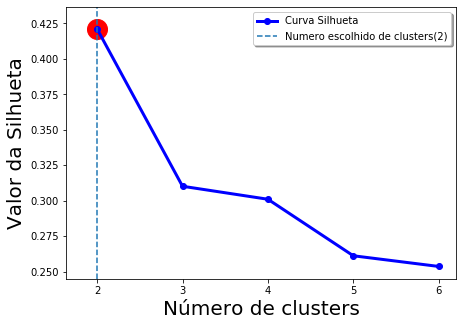

In [16]:
print_silhouettes(silhouettes)

### para todos os testes da amostra os resultados de Silhueta foram o mesmo. 0.42

In [29]:
notas

NU_NOTA_LC  NU_NOTA_REDACAO  NU_NOTA_MT  NU_NOTA_CH  NU_NOTA_CN
140778       644.0            640.0       646.3       598.2       587.6
280989       540.4            640.0       646.2       538.4       456.3
822335       360.9             80.0       390.1       335.5       364.9
327086       594.2            720.0       640.2       612.5       598.4
551281       449.5            480.0       392.1       451.7       332.5
...            ...              ...         ...         ...         ...
196779       515.7            580.0       522.7       503.2       428.6
813982       470.8            460.0       450.4       512.1       414.2
429420       534.7            600.0       542.7       554.7       539.6
559606       545.0            700.0       610.1       587.9       510.7
194363       538.4            720.0       493.5       533.4       548.0

[200000 rows x 5 columns]

Time:  1.119969367980957


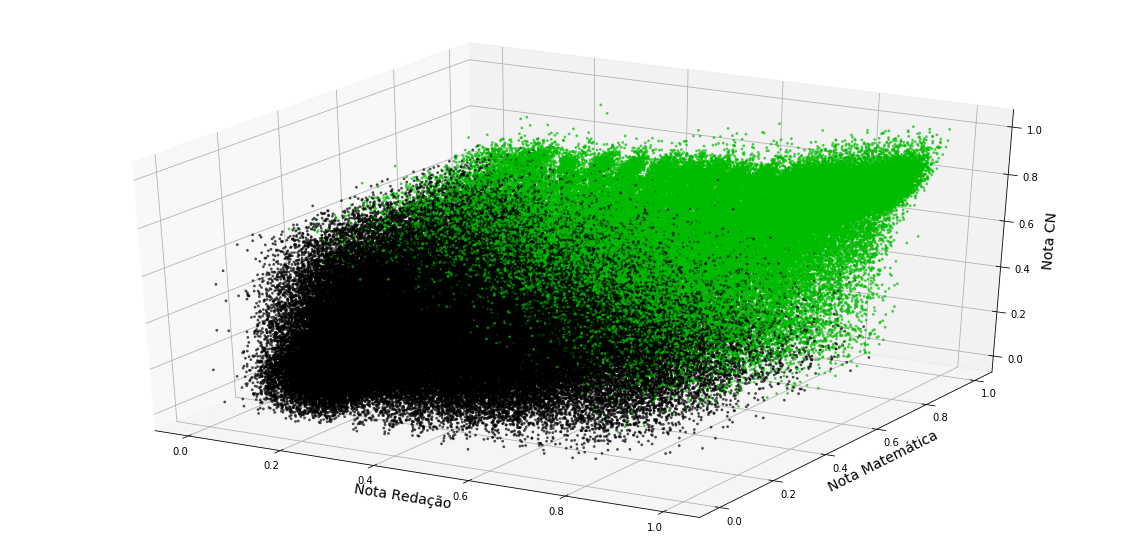

In [34]:
sample = dados.sample(200000,random_state=13)
notas = get_notas(sample)
notas_processadas = preprocess(notas,1)
clusters, clusterer = clustering(notas_processadas,2)
print_clusters_3d(preprocess(notas[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']],1),clusterer,clusters, 2)
#silhouette(notas_processadas,clusters)

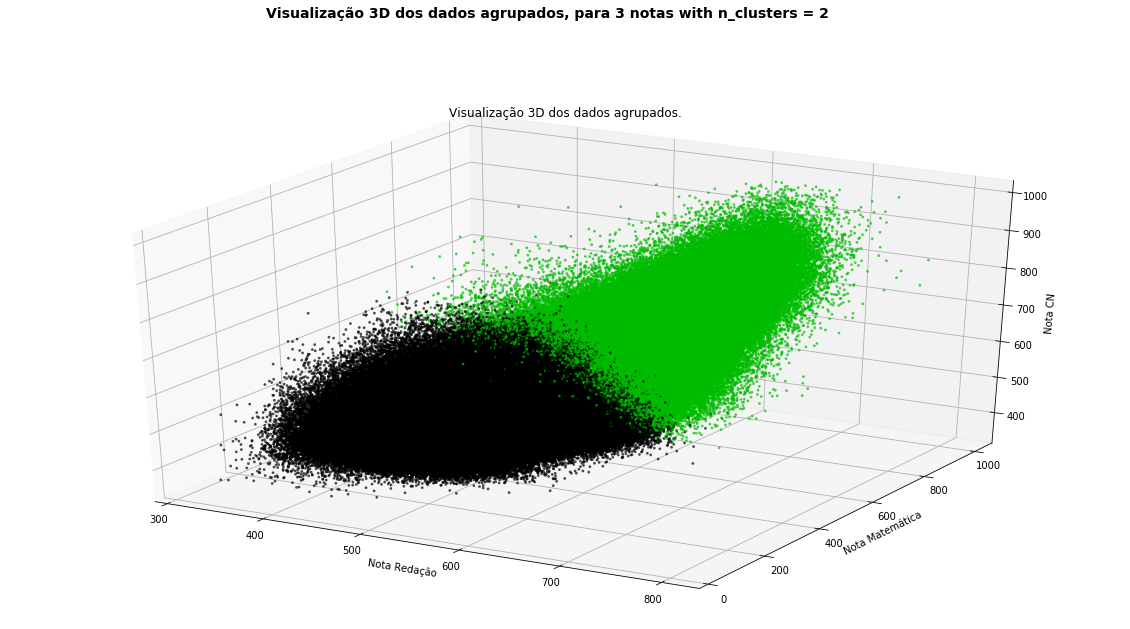

In [18]:
print_clusters_3d(notas_processadas,clusterer,clusters, 2)

Time:  5.677847623825073


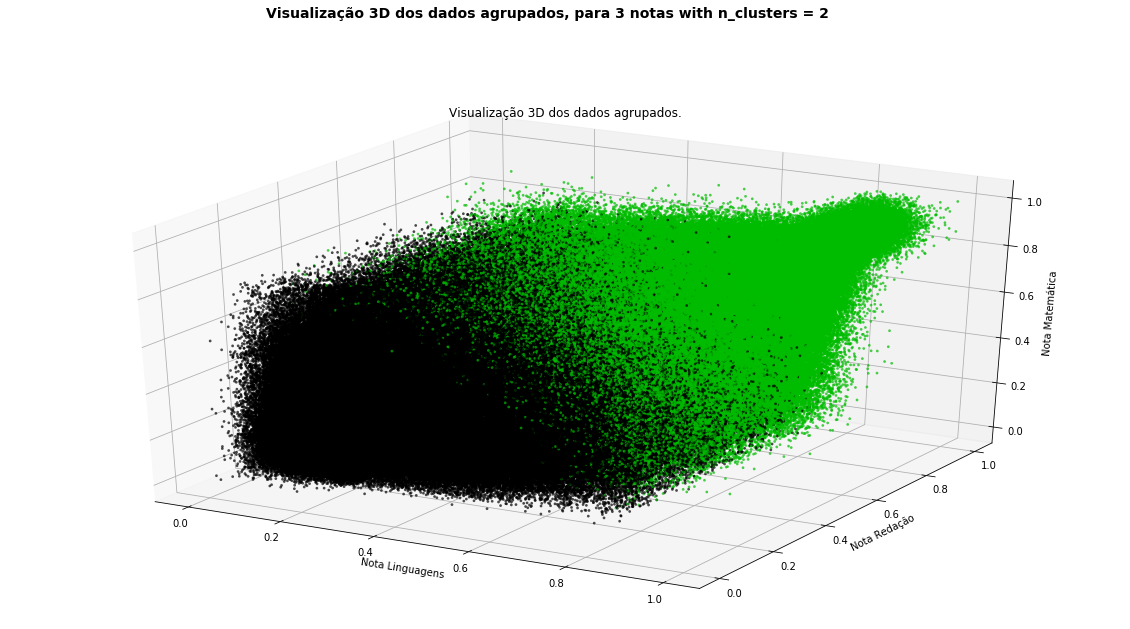

In [13]:
sample = dados
notas = get_notas(sample)
notas_processadas = preprocess(notas,1)
clusters, clusterer = clustering(notas_processadas,2)
print_clusters_3d(notas_processadas,clusterer,clusters, 2)
# silhouette(notas_processadas,clusters) 0.42

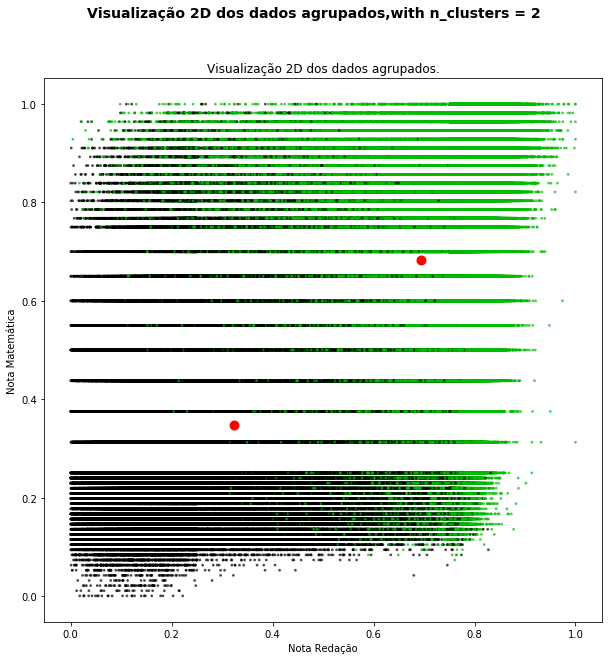

In [15]:
print_clusters_2d(notas_processadas,clusterer,clusters, 2)

TypeError: 'Figure' object is not callable

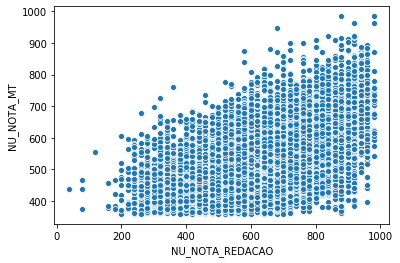

In [61]:
sel = math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']]
ax = sns.scatterplot(data=sel,x="NU_NOTA_REDACAO", y="NU_NOTA_MT")
ax.figure.set_

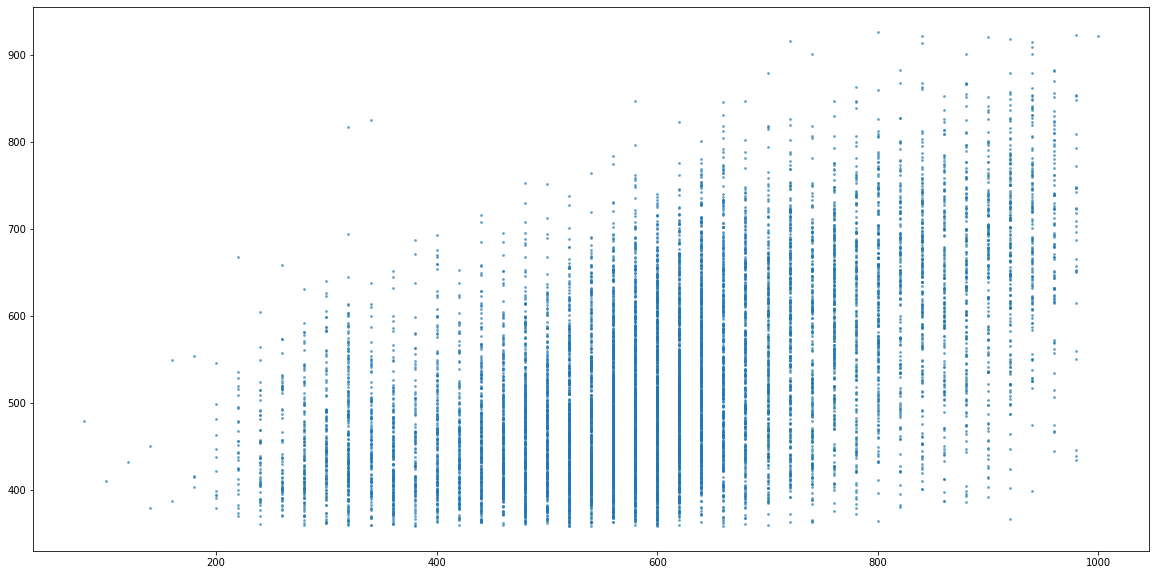

In [50]:
fig = plt.figure(figsize=(20,10))
ax2 = fig.add_subplot(111)
ax2.scatter(notas[:, 0], notas[:,1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

Time:  0.5614988803863525
0.4760160857288304
Time:  121.03699135780334


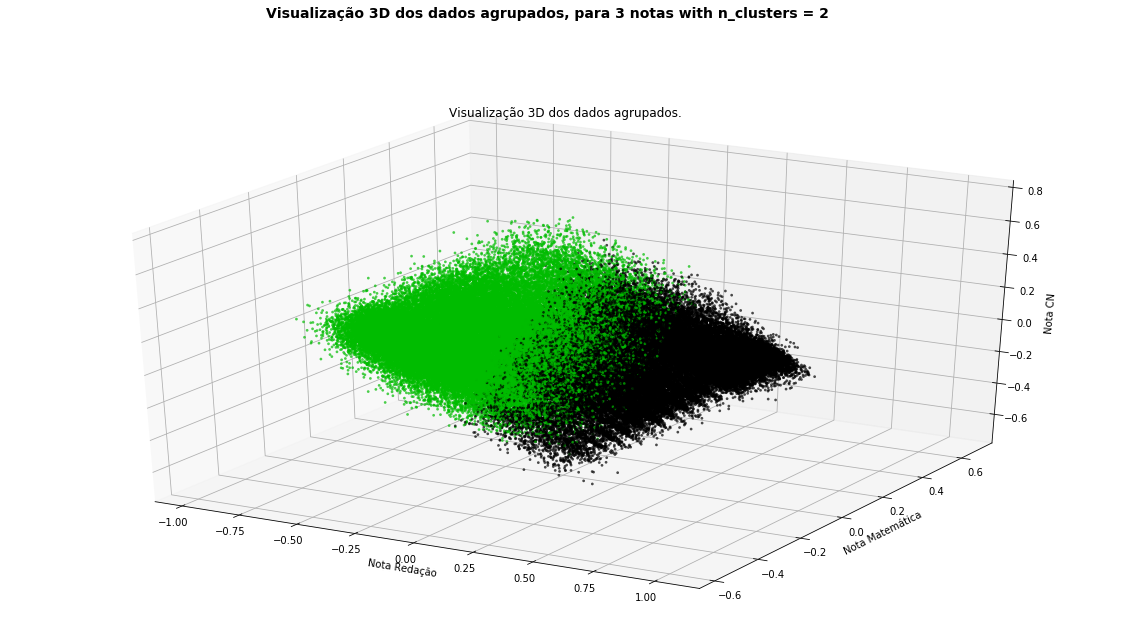

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
sample = dados.sample(100000)
# math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(get_notas(sample),1)
notas_3 = pca.fit_transform(notas_processadas)
clusters, clusterer = clustering(notas_3,2)
silhouette(notas_3,clusters)
print_clusters_3d(notas_3,clusterer,clusters, 2)
# plt.figure(figsize=(14,8))
# sns.scatterplot(x = notas_3[:,0] , y = notas_3[:,1])

Time:  4.243651390075684


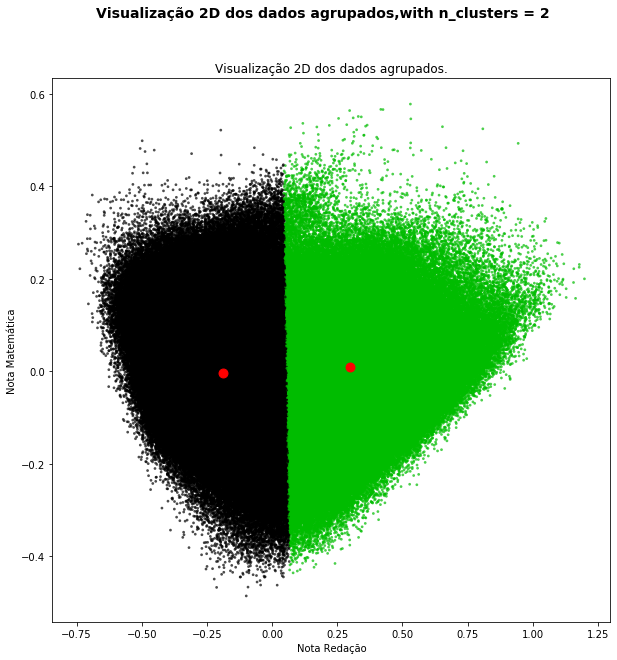

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
sample = dados
# math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(get_notas(sample),2)
notas_3 = pca.fit_transform(notas_processadas)
clusters, clusterer = clustering(notas_3,2)
# silhouette(notas_3,clusters)
print_clusters_2d(notas_3,clusterer,clusters, 2)
# plt.figure(figsize=(14,8))
# sns.scatterplot(x = notas_3[:,0] , y = notas_3[:,1])

Time:  0.29919910430908203
0.35751719305225577
Time:  4.638616561889648


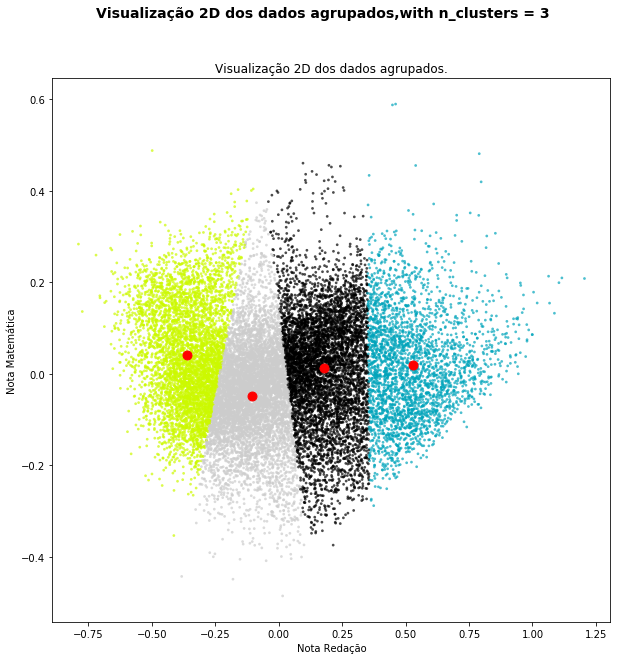

In [66]:
from sklearn.decomposition import PCA

np.random.seed(13)
pca = PCA(n_components = 2,random_state=13)
sample = dados.sample(20000, random_state=13 )
# math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(get_notas(sample),2)
notas_3 = pca.fit_transform(notas_processadas)
clusters, clusterer = clustering(notas_3,4)
silhouette(notas_3,clusters)
print_clusters_2d(notas_3,clusterer,clusters, 3)
# plt.figure(figsize=(14,8))
# sns.scatterplot(x = notas_3[:,0] , y = notas_3[:,1])

Time:  2.268932580947876
0.4004994890883674
Time:  443.7064940929413


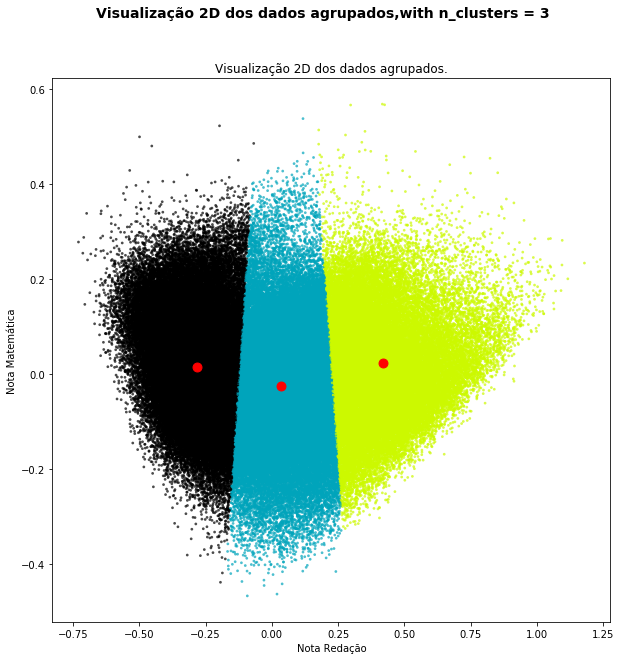

In [65]:
from sklearn.decomposition import PCA

np.random.seed(13)
pca = PCA(n_components = 2,random_state=13)
sample = dados.sample(200000, random_state=13 )
# math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(get_notas(sample),2)
notas_3 = pca.fit_transform(notas_processadas)
clusters, clusterer = clustering(notas_3,3)
silhouette(notas_3,clusters)
print_clusters_2d(notas_3,clusterer,clusters, 3)
# plt.figure(figsize=(14,8))
# sns.scatterplot(x = notas_3[:,0] , y = notas_3[:,1])

Time:  4.916651487350464


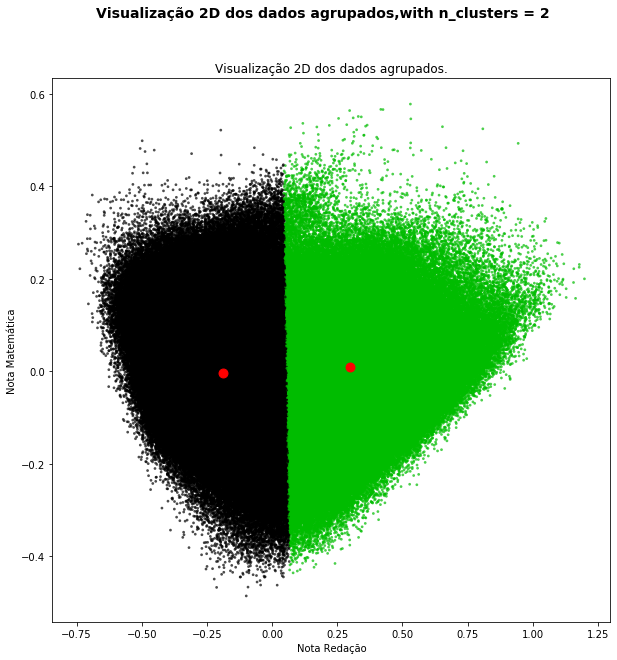

In [67]:
from sklearn.decomposition import PCA

np.random.seed(13)
pca = PCA(n_components = 2,random_state=13)
sample = dados
# math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(get_notas(sample),2)
notas_3 = pca.fit_transform(notas_processadas)
clusters, clusterer = clustering(notas_3,2)
#silhouette(notas_3,clusters)
print_clusters_2d(notas_3,clusterer,clusters, 2)
# plt.figure(figsize=(14,8))
# sns.scatterplot(x = notas_3[:,0] , y = notas_3[:,1])

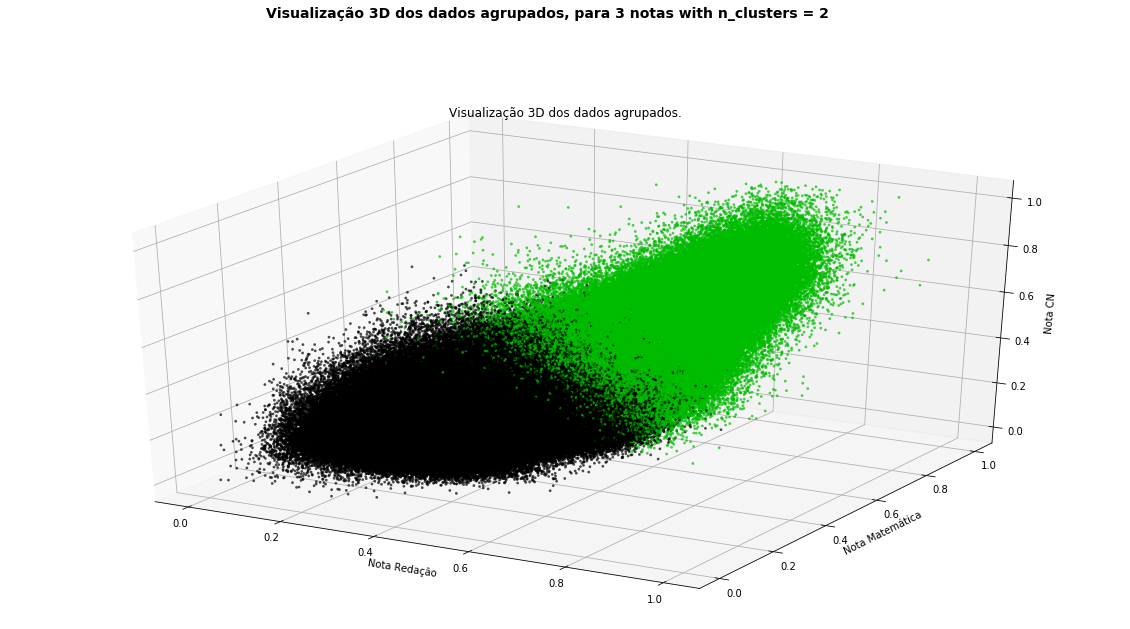

In [68]:
print_clusters_3d(notas_processadas,clusterer,clusters, 2)

Time:  0.558570146560669
0.47476568568258415
Time:  134.4022045135498


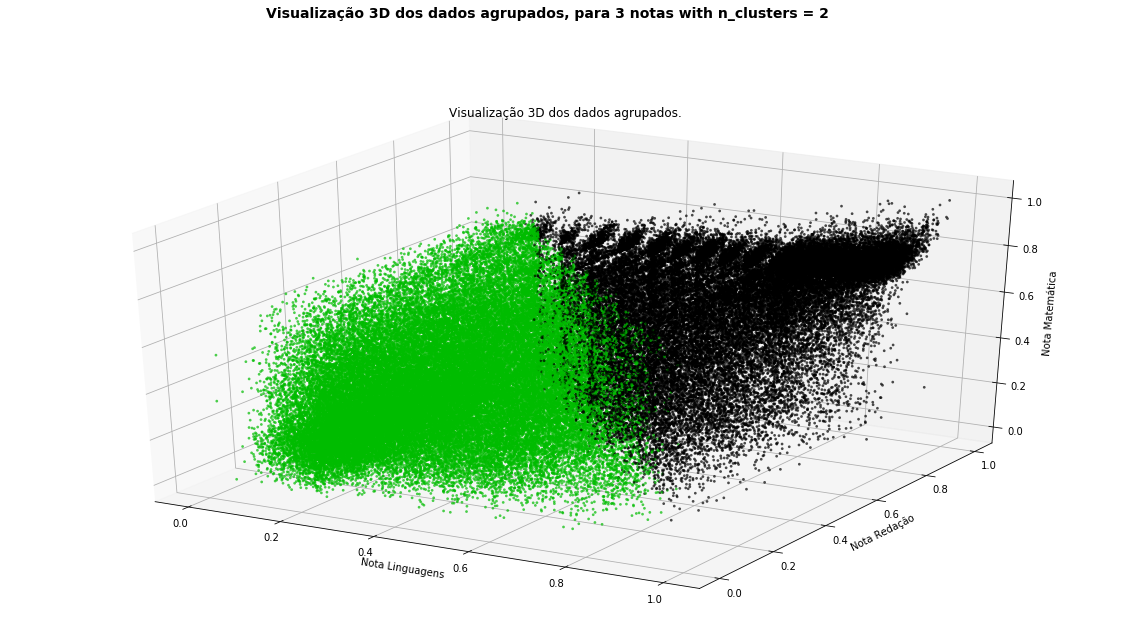

In [6]:
sample = dados.sample(100000)
math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']],1)
# notas = math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']].values
clusters, clusterer = clustering(notas_processadas,2)
silhouette(notas_processadas,clusters)
# print_clusters_2d(notas_processadas,clusterer,clusters, 2)
print_clusters_3d(preprocess(math_redacao,1),clusterer,clusters, 2)

Time:  3.189060926437378
0.47379153048799827
Time:  3256.8697538375854


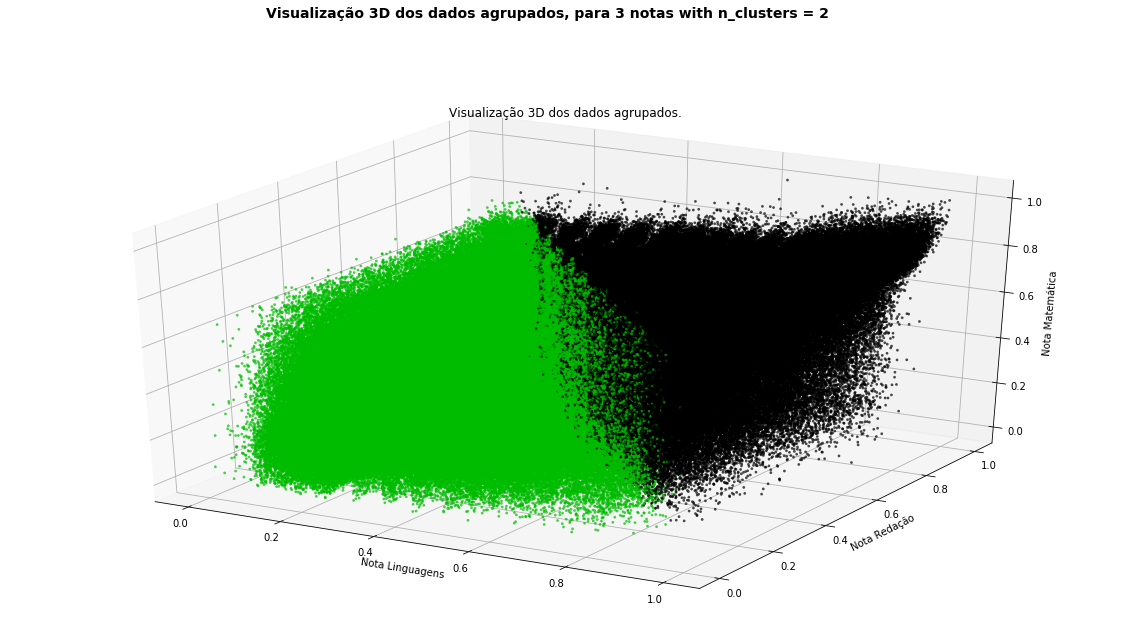

In [8]:
sample = dados.sample(500000)
math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']],1)
# notas = math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']].values
clusters, clusterer = clustering(notas_processadas,2)
silhouette(notas_processadas,clusters)
# print_clusters_2d(notas_processadas,clusterer,clusters, 2)
print_clusters_3d(preprocess(math_redacao,1),clusterer,clusters, 2)

Time:  0.10372161865234375
0.45657499115939465
Time:  4.38826584815979


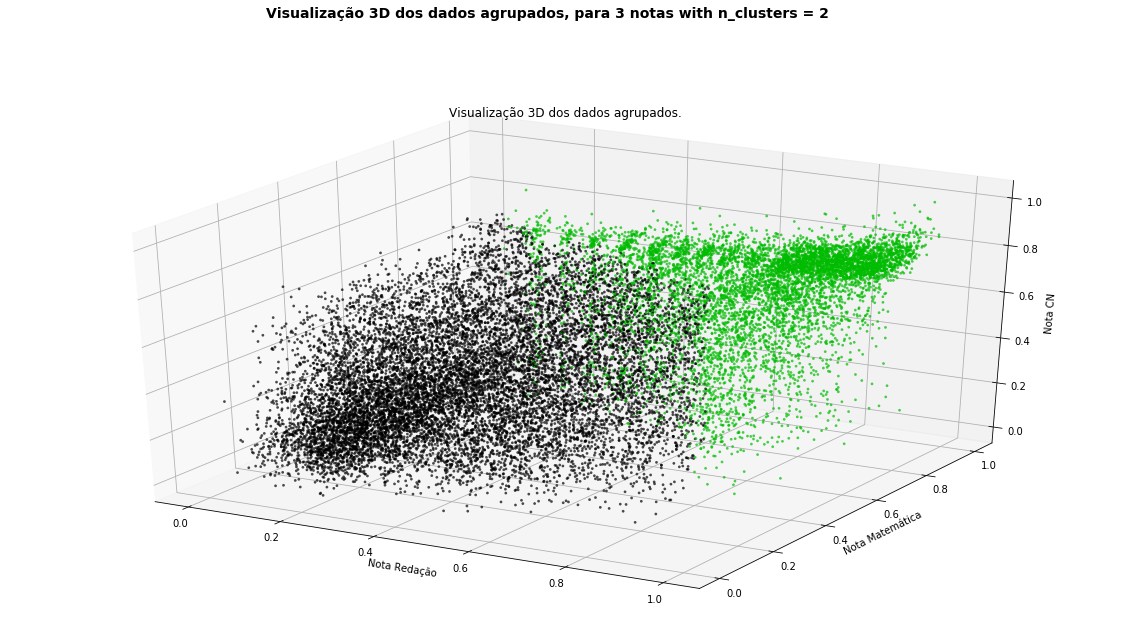

In [33]:
sample = dados.sample(20000)
math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']],2)
# notas = math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']].values
clusters, clusterer = clustering(notas_processadas,2)
silhouette(notas_processadas,clusters)
# print_clusters_2d(notas_processadas,clusterer,clusters, 2)
print_clusters_3d(preprocess(math_redacao,1),clusterer,clusters, 2)

Time:  5.5635669231414795


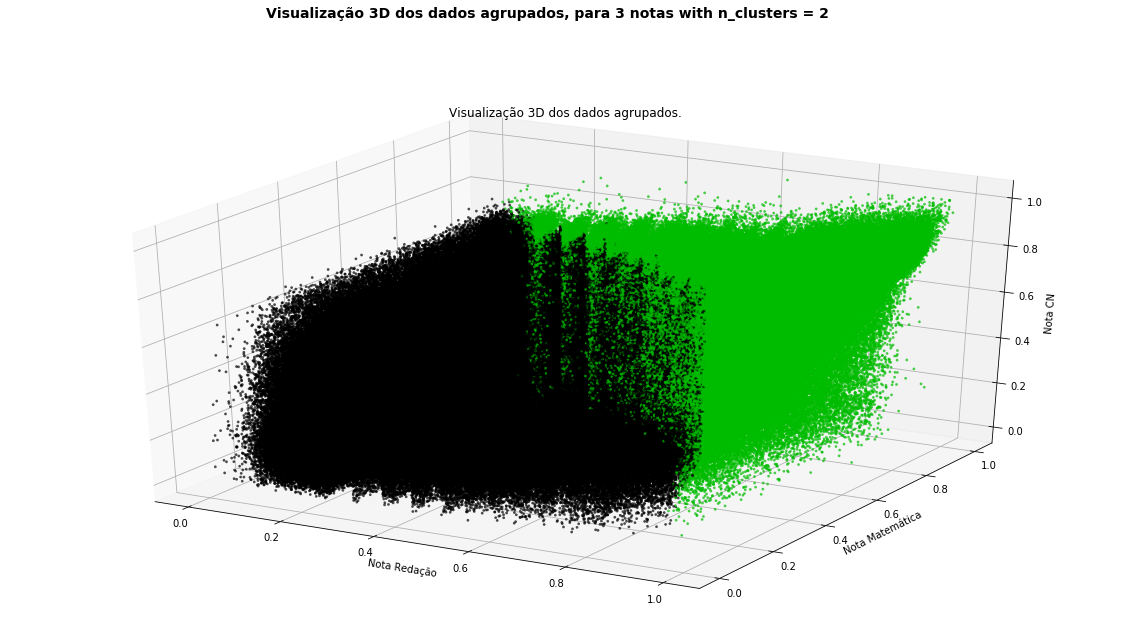

In [25]:
sample = dados
math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']],0)
# notas = math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']].values
clusters, clusterer = clustering(notas_processadas,2)
#silhouette(notas_processadas,clusters)
# print_clusters_2d(notas_processadas,clusterer,clusters, 2)
print_clusters_3d(preprocess(math_redacao,1),clusterer,clusters, 2)

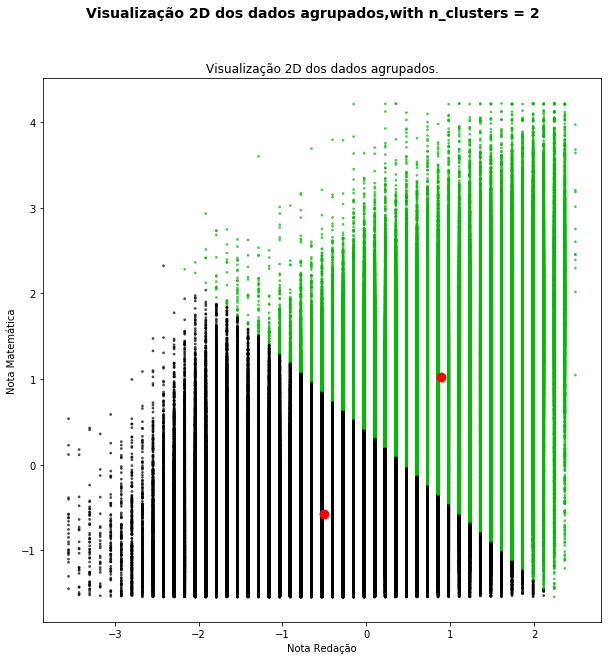

In [28]:
print_clusters_2d(notas_processadas,clusterer,clusters, 2)

In [55]:
dados['Cluster'] = clusters

In [58]:
dados['Cluster'].value_counts()

0    564012
1    356576
Name: Cluster, dtype: int64

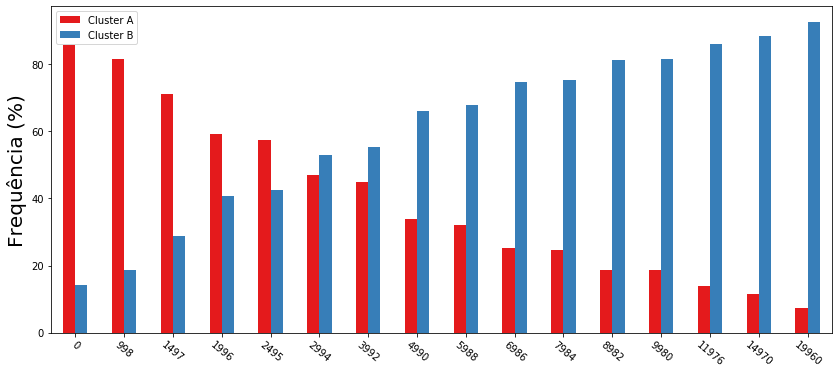

In [47]:
dadosEnem = dados
rendas = [] 
limites = ['0','998','1497','1996','2495','2994','3992','4990','5988','6986','7984','8982','9980','11976','14970','19960']

for var in limites:
    total_Renda = dadosEnem.query("RendaMaxima == " + var).shape[0]                                      
    rendas.append(dadosEnem.query("RendaMaxima == " + var + "and Cluster == 0").shape[0]/total_Renda)
    rendas.append(dadosEnem.query("RendaMaxima == " + var +  "and Cluster == 1").shape[0]/total_Renda)    



teste = pd.DataFrame({'0':rendas[:2], '998':rendas[2:4],'1497':rendas[4:6],'1996':rendas[6:8],'2495':rendas[8:10],
                      '2994':rendas[10:12],
                      '3992':rendas[12:14],'4990':rendas[14:16],'5988':rendas[16:18],'6986':rendas[18:20],'7984':rendas[20:22],
                      '8982':rendas[22:24],'9980':rendas[24:26],'11976':rendas[26:28],'14970':rendas[28:30],'19960':rendas[30:32]})

df = teste.T
df.columns = ['Cluster A','Cluster B']



ax = df.plot(kind='bar',figsize=(14, 6))

ax.set_yticklabels(['0','20','40','60','80','100'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=-40)
text = ax.set_ylabel("Frequência (%)")
text.set_fontsize(20)
    



-----
-----
-----
-----
-----
-----


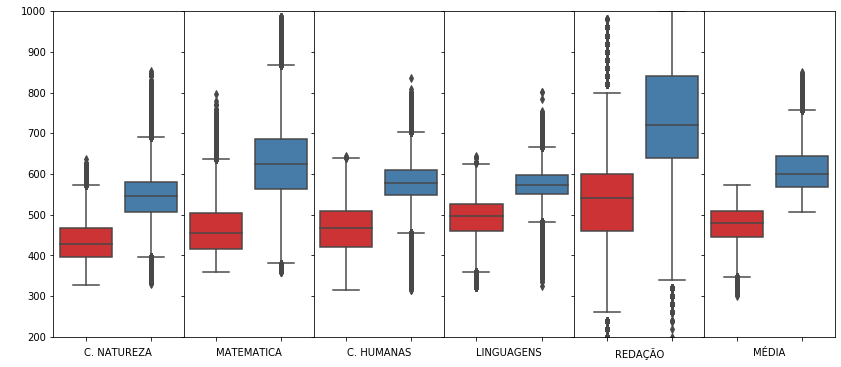

In [60]:
sns.set_palette(sns.color_palette("Set1"))
# colors=[(0.21568627450980393, 0.4941176470588236, 0.7215686274509804),(0.8941176470588235, 0.10196078431372557, 0.10980392156862737)]


area = plt.figure(figsize=(14, 6))
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
notas = ['NU_NOTA_CN','NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_MEDIA']
nomes = ['C. NATUREZA','MATEMATICA','C. HUMANAS','LINGUAGENS','REDAÇÃO','MÉDIA']
for i in range(len(notas)):
    g = area.add_subplot(1, 6, i+1)
    g = sns.boxplot(x="Cluster", y=notas[i], data=dados)
    #print(notas[i])
#     A = dadosEnem.query("Cluster == 'A'")[notas[i]].median()
#     B = dadosEnem.query("Cluster == 'B'")[notas[i]].median()
#     print("Notas Custer A", A)
#     print("Notas Custer B", B )
#     print("Diferença: ", B - A)
    print("-----")
    g.set_ylabel(" ")
    g.set_xlabel(nomes[i])
    g.set_ylim(200,1001)
    g.set_xticklabels("")
    if(i!=0):
        g.set_yticklabels("")
       



plt.subplots_adjust(wspace = 0)


#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
#G.set_xlabel(" ")
#G.set_ylabel(" ")

Text(0, 0.5, ' ')

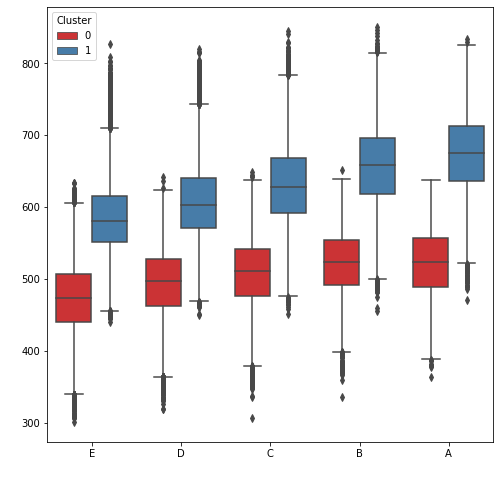

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))
df = dadosEnem
#escolas_notas.sort_values('TP_DEPENDENCIA_ADM_ESC',  ascending=True, inplace=True)
G = sns.boxplot(x="ClasseSocial", y="NU_MEDIA", data=df,  hue="Cluster", order=['E','D','C','B','A'])
#G.set_xticklabels(G.get_xticklabels(),rotation=-30)
#G.set_xticklabels(['NaoSabe','F. Incompleto','F. Completo','Medio','Superior'])
G.set_xlabel(" ")
G.set_ylabel(" ")

In [78]:
dados.columns

Index(['TP_SEXO', 'TP_COR_RACA', 'CO_ESCOLA', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'CO_UF_ESC', 'Estudo Pai', 'Estudo Mãe',
       'Trabalho Pai', 'Trabalho Mãe', 'Tem Celular', 'Tem Computador',
       'Tem Internet', 'RendaMaxima', 'ClasseSocial', 'anosEstudoPai',
       'anosEstudoMae', 'COR_RACA', 'RazaoPessoasQuarto', 'PessoasPorQuarto',
       'NU_MEDIA', 'MEDIA_FAIXA', 'Cluster'],
      dtype='object')

In [57]:
dados.groupby("Cluster")['TP_DEPENDENCIA_ADM_ESC'].value_counts()

Cluster  TP_DEPENDENCIA_ADM_ESC
0        Estadual                  516683
         Particular                 31509
         Federal                    11446
         Municipal                   4374
1        Estadual                  194825
         Particular                123578
         Federal                    34911
         Municipal                   3262
Name: TP_DEPENDENCIA_ADM_ESC, dtype: int64

In [49]:
dados.groupby("Cluster")['Estudo Mãe'].value_counts()

Cluster  Estudo Mãe           
0        Medio                    193269
         FundamentalIncompleto    188486
         FundamentalCompleto       94556
         Superior                  61732
         NaoSabe                   25362
1        Medio                    136885
         Superior                 122477
         FundamentalIncompleto     51897
         FundamentalCompleto       39812
         NaoSabe                    6112
Name: Estudo Mãe, dtype: int64

In [50]:
dados.groupby("Cluster")['Tem Computador'].value_counts()

Cluster  Tem Computador
0        Não               336661
         Sim               226744
1        Sim               262611
         Não                94572
Name: Tem Computador, dtype: int64

Time:  0.1376028060913086
0.3917941755466068
Time:  1.575817346572876


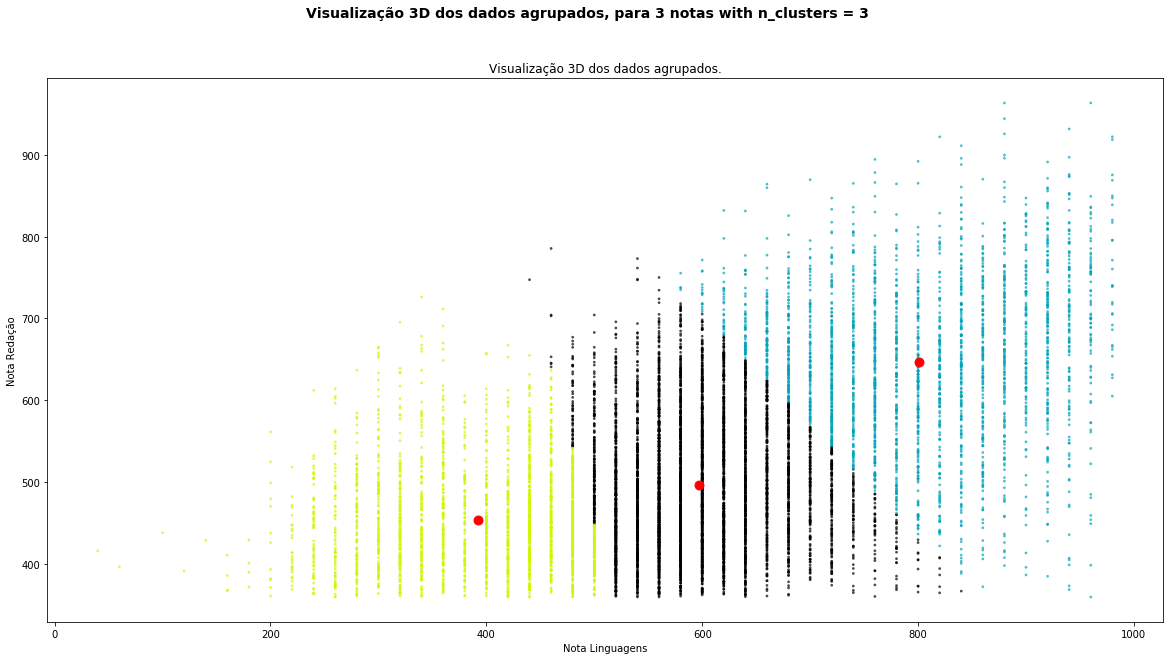

In [60]:
sample = dados.sample(10000)
math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(math_redacao[['NU_NOTA_REDACAO','NU_NOTA_MT']])
clusters, clusterer = clustering(notas,3)
silhouette(notas,clusters)
print_clusters_2d(notas,clusterer,clusters, 3)


Time:  0.19944286346435547
0.32870327867658755
Time:  1.5149502754211426


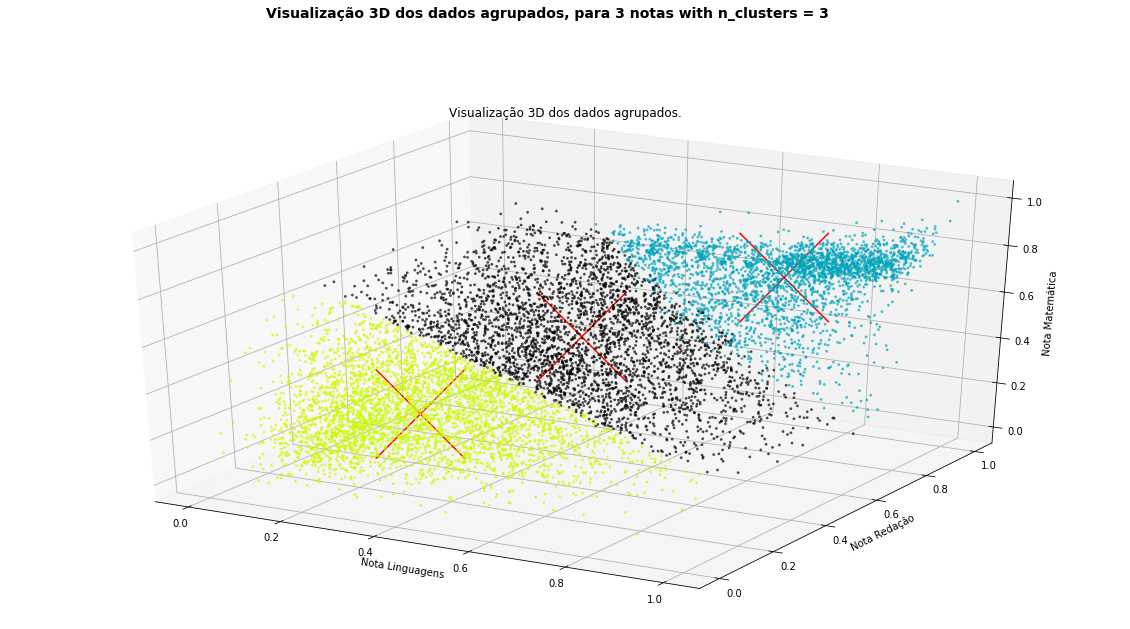

In [29]:
sample = dados.sample(10000)
math_redacao = sample[['NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN']]
notas_processadas = preprocess(math_redacao)
clusters, clusterer = clustering(notas_processadas,3)
silhouette(notas_processadas,clusters)
print_clusters_3d(notas_processadas,clusterer,clusters, 3)

In [62]:
dados['Cluster'] = clusters

In [59]:
dados.to_csv("dadosAgrupados_PCA.csv",sep=";",encoding='latin1', index=False)

0    497288
1    423300
Name: Cluster, dtype: int64